In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt


In [1]:
# Install TensorFlow
!pip install tensorflow


In [3]:
# Load processed dataset
df = pd.read_csv('/content/processed_base_station_data.csv')

# Select features
feature_cols = ['RSRP', 'delta_rsrp', 'rolling_rsrp_mean', 'rolling_rsrp_std', 'rsrp_trend']
target_col = 'activity_binary'

# Scale features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df[feature_cols])

# Create sequences for LSTM
sequence_length = 10
X, y = [], []
for i in range(sequence_length, len(df)):
    X.append(scaled_features[i-sequence_length:i])
    y.append(df[target_col].iloc[i])
X, y = np.array(X), np.array(y)



In [ ]:

#  Step 1: Feature Selection for Multivariate LSTM
selected_features = ['RSRP', 'RSRQ', 'rolling_rsrp_mean', 'rsrp_trend']
df_lstm = df[selected_features + ['timestamp', 'activity_binary']].dropna()

# Normalize the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_lstm[selected_features])

# Step 2: Prepare Sequences for LSTM
def create_sequences(X, y, time_steps=10):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        Xs.append(X[i:(i + time_steps)])
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

time_steps = 10
X, y = create_sequences(scaled_features, df_lstm['activity_binary'].values, time_steps=time_steps)

# Step 3: Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:

# Step 4: Bidirectional LSTM Model with Dropout
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional

model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:

#  Step 5: Train the updated model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.5857 - loss: 0.6608 - val_accuracy: 0.6633 - val_loss: 0.6087
Epoch 2/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.6717 - loss: 0.6011 - val_accuracy: 0.6583 - val_loss: 0.6496
Epoch 3/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6994 - loss: 0.5738 - val_accuracy: 0.6967 - val_loss: 0.5815
Epoch 4/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7096 - loss: 0.5681 - val_accuracy: 0.7072 - val_loss: 0.5829
Epoch 5/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7099 - loss: 0.5658 - val_accuracy: 0.6922 - val_loss: 0.5993
Epoch 6/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7103 - loss: 0.5637 - val_accuracy: 0.7085 - val_loss: 0.5695
Epoch 7/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7122 - loss: 0.5618 - val_accuracy: 0.7086 - val_loss: 0.5782
Epoch 8/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.7191 -

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


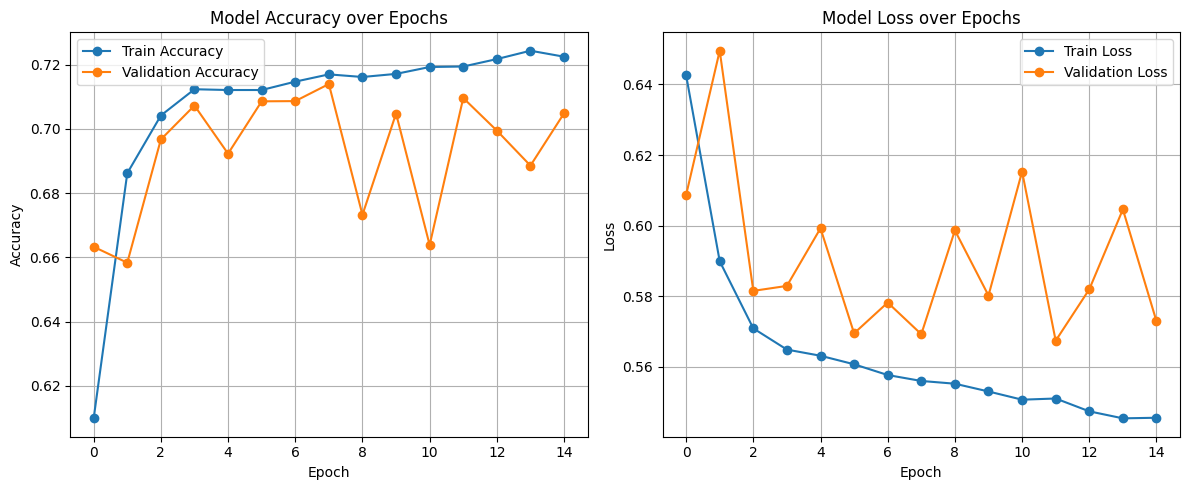

In [ ]:
plot_accuracy_loss(history)


Bidirectional LSTM Model with Dropout

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [ ]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 64)             │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,729 (69.25 KB)

 Trainable params: 17,729 (69.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.5790 - loss: 0.6689 - val_accuracy: 0.6514 - val_loss: 0.6341
Epoch 2/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6358 - loss: 0.6323 - val_accuracy: 0.6606 - val_loss: 0.6263
Epoch 3/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6582 - loss: 0.6233 - val_accuracy: 0.6665 - val_loss: 0.6214
Epoch 4/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.6747 - loss: 0.6060 - val_accuracy: 0.6845 - val_loss: 0.6114
Epoch 5/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.6888 - loss: 0.5925 - val_accuracy: 0.6939 - val_loss: 0.6020
Epoch 6/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7066 - loss: 0.5793 - val_accuracy: 0.6929 - val_loss: 0.6055
Epoch 7/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7094 - loss: 0.5740 - val_accuracy: 0.6559 - val_loss: 0.6305
Epoch 8/10
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7156 - loss: 0

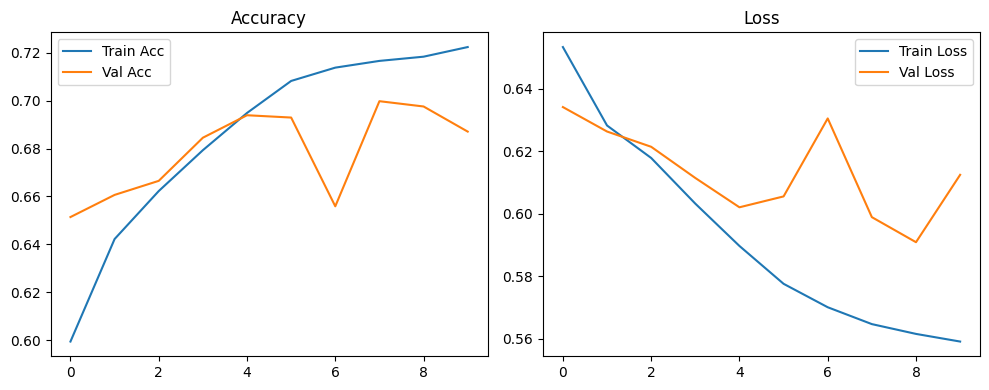

In [ ]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.legend()
plt.tight_layout()
plt.show()


Training accuracy is gradually increasing over epochs → your model is learning.

Training loss is consistently decreasing → the learning process is stable.

Validation accuracy is not diverging wildly → slight fluctuations are expected.

Validation loss is close to training loss → no severe overfitting.



3310/3310 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


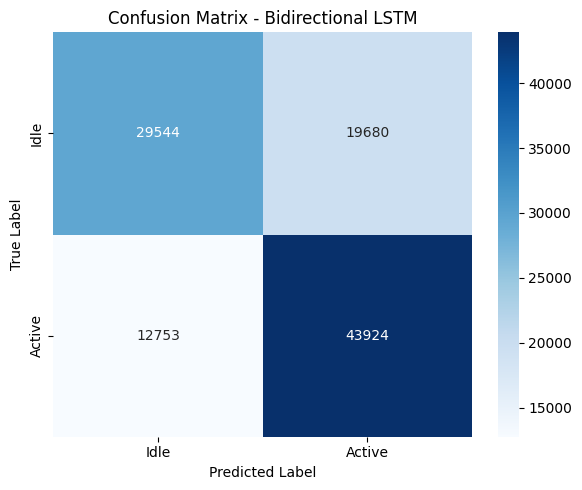

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Idle', 'Active'], yticklabels=['Idle', 'Active'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Bidirectional LSTM')
plt.tight_layout()
plt.show()


3310/3310 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step
✅ Accuracy: 0.6937

Classification Report:
              precision    recall  f1-score   support

         0.0       0.70      0.60      0.65     49224
         1.0       0.69      0.77      0.73     56677

    accuracy                           0.69    105901
   macro avg       0.69      0.69      0.69    105901
weighted avg       0.69      0.69      0.69    105901



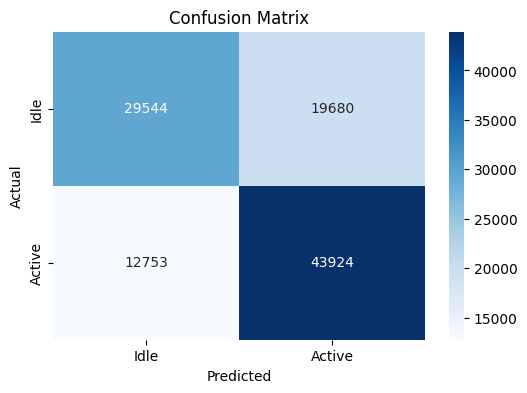

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Predict
y_pred_proba = model.predict(X_test)
y_pred = (y_pred_proba > 0.5).astype(int).flatten()

# Flatten true labels
y_test_flat = y_test.flatten()

# Clean: Remove NaNs from y_test and align y_pred accordingly
mask = ~np.isnan(y_test_flat)
y_test_clean = y_test_flat[mask]
y_pred_clean = y_pred[mask]

# Accuracy
accuracy = accuracy_score(y_test_clean, y_pred_clean)
print(f"✅ Accuracy: {accuracy:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_clean, y_pred_clean))

# Confusion Matrix
cm = confusion_matrix(y_test_clean, y_pred_clean)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Idle", "Active"], yticklabels=["Idle", "Active"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


3310/3310 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step


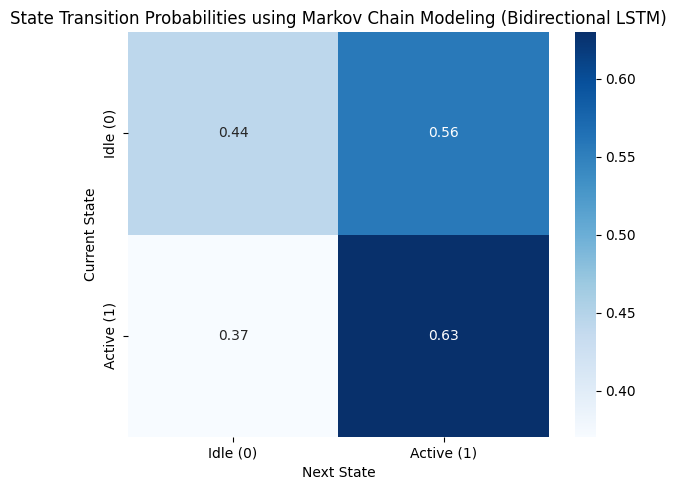

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Convert predictions and true labels to 1D arrays
y_pred = (model.predict(X_test) > 0.5).astype("int32").flatten()
y_true = y_test.flatten()

# Combine true and predicted to simulate temporal transitions
# For Markov modeling, we assume a sequence — so use predicted labels
# Here we simulate that the predictions represent a time-series of state changes
transitions = list(zip(y_pred[:-1], y_pred[1:]))

# Initialize transition matrix
transition_matrix = np.zeros((2, 2))

for (i, j) in transitions:
    transition_matrix[i, j] += 1

# Normalize to get probabilities
transition_probs = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# Labels for the states
labels = ['Idle (0)', 'Active (1)']

# Plotting the heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(transition_probs, annot=True, cmap="Blues", fmt=".2f", xticklabels=labels, yticklabels=labels)
plt.title("State Transition Probabilities using Markov Chain Modeling (Bidirectional LSTM)")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.tight_layout()
plt.show()


In [ ]:
# Print actual vs predicted values (after removing NaNs)
print("\nSample Predictions vs Actual:")
for i in range(min(20, len(y_test_clean))):
    print(f"Actual: {int(y_test_clean[i])}  |  Predicted: {int(y_pred_clean[i])}")



Sample Predictions vs Actual:
Actual: 0  |  Predicted: 0
Actual: 0  |  Predicted: 1
Actual: 1  |  Predicted: 1
Actual: 1  |  Predicted: 1
Actual: 1  |  Predicted: 0
Actual: 0  |  Predicted: 0
Actual: 1  |  Predicted: 1
Actual: 1  |  Predicted: 1
Actual: 0  |  Predicted: 0
Actual: 0  |  Predicted: 1
Actual: 0  |  Predicted: 1
Actual: 1  |  Predicted: 1
Actual: 0  |  Predicted: 1
Actual: 1  |  Predicted: 1
Actual: 1  |  Predicted: 1
Actual: 1  |  Predicted: 1
Actual: 0  |  Predicted: 0
Actual: 0  |  Predicted: 0
Actual: 1  |  Predicted: 1
Actual: 1  |  Predicted: 1


 Markov Chain Transition Matrix (Probabilities):
         Idle  Active
Idle    0.289   0.711
Active  0.531   0.469


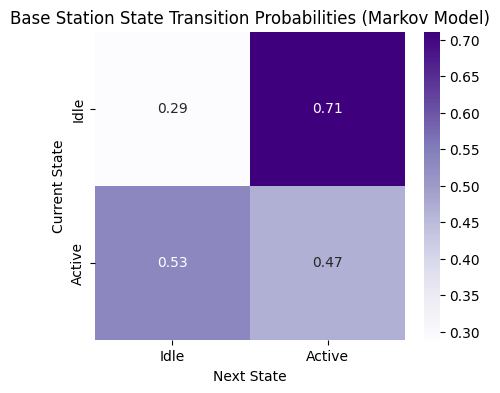

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# -----------------------------------------
# STEP 1: Extract state sequence
# -----------------------------------------
# Use your already-labeled activity column (0 = Idle, 1 = Active)
states = df['activity_binary'].dropna().astype(int).values

# -----------------------------------------
# STEP 2: Initialize transition counts
# -----------------------------------------
transition_matrix = np.zeros((2, 2))  # Rows = From, Cols = To

for i in range(len(states) - 1):
    current_state = states[i]
    next_state = states[i + 1]
    transition_matrix[current_state, next_state] += 1

# -----------------------------------------
# STEP 3: Convert counts to probabilities
# -----------------------------------------
transition_prob = transition_matrix / transition_matrix.sum(axis=1, keepdims=True)

# -----------------------------------------
# STEP 4: Create a labeled DataFrame
# -----------------------------------------
transition_df = pd.DataFrame(
    transition_prob,
    index=["Idle", "Active"],
    columns=["Idle", "Active"]
)

print(" Markov Chain Transition Matrix (Probabilities):")
print(transition_df.round(3))

# -----------------------------------------
# STEP 5: Visualize as heatmap
# -----------------------------------------
plt.figure(figsize=(5, 4))
sns.heatmap(transition_df, annot=True, cmap="Purples", fmt=".2f")
plt.title("Base Station State Transition Probabilities (Markov Model)")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.show()


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional

# Bidirectional LSTM Model
model = Sequential()
model.add(Bidirectional(LSTM(64, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.3))  # Prevent overfitting
model.add(LSTM(32))  # Deeper learning
model.add(Dense(1, activation='sigmoid'))  # Binary output: Active or Idle

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional) │ (None, 10, 128)        │        35,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 32)             │        20,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 55,969 (218.63 KB)

 Trainable params: 55,969 (218.63 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#  Train the Bidirectional LSTM model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Bidirectional LSTM - Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Bidirectional LSTM - Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call the function after training
plot_accuracy_loss(history)


In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step
[[   0 6283]
 [   0 8206]]
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00      6283
         1.0       0.57      1.00      0.72      8206

    accuracy                           0.57     14489
   macro avg       0.28      0.50      0.36     14489
weighted avg       0.32      0.57      0.41     14489



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 Transition Labeling

transition_label = 1 if current_state ≠ previous_state else 0


In [ ]:
#  Step 1: Create transition labels
# Shift the activity column by one to get the previous state
df_lstm['prev_state'] = df_lstm['activity_binary'].shift(1)

# If the current state ≠ previous state, it's a transition
df_lstm['transition'] = (df_lstm['activity_binary'] != df_lstm['prev_state']).astype(int)

# Drop the first row (which has NaN from shift)
df_lstm = df_lstm.dropna().reset_index(drop=True)

# Display how many transitions there are
print(df_lstm['transition'].value_counts())


transition
1    44068
0    28383
Name: count, dtype: int64


In [ ]:
# Align scaled features and transition labels
scaled_features = scaled_features[:len(df_lstm)]


In [ ]:
X, y = create_sequences(scaled_features, df_lstm['transition'].values, time_steps=time_steps)


In [ ]:
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.5889 - loss: 0.6615 - val_accuracy: 0.6692 - val_loss: 0.6027
Epoch 2/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.6812 - loss: 0.5956 - val_accuracy: 0.6804 - val_loss: 0.6083
Epoch 3/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7020 - loss: 0.5747 - val_accuracy: 0.6960 - val_loss: 0.5813
Epoch 4/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7118 - loss: 0.5655 - val_accuracy: 0.7011 - val_loss: 0.5778
Epoch 5/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7133 - loss: 0.5598 - val_accuracy: 0.6838 - val_loss: 0.5878
Epoch 6/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.7143 - loss: 0.5618 - val_accuracy: 0.7070 - val_loss: 0.5786
Epoch 7/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.7164 - loss: 0.5587 - val_accuracy: 0.7056 - val_loss: 0.5707
Epoch 8/15
1812/1812 ━━━━━━━━━━━━━━━━━━━━ 18s 10ms/step - accuracy: 0.7185 -

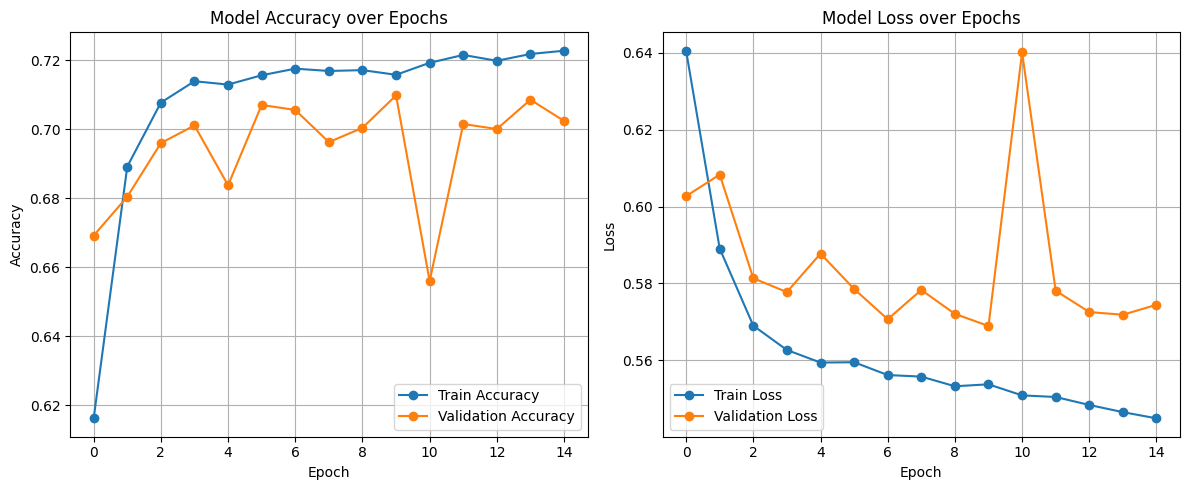

In [ ]:
plot_accuracy_loss(history)


In [ ]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Transition Prediction - Test Accuracy: {accuracy:.4f}")
print(f"Transition Prediction - Test Loss: {loss:.4f}")


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


453/453 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
[[3365 2918]
 [1394 6812]]
              precision    recall  f1-score   support

         0.0       0.71      0.54      0.61      6283
         1.0       0.70      0.83      0.76      8206

    accuracy                           0.70     14489
   macro avg       0.70      0.68      0.68     14489
weighted avg       0.70      0.70      0.69     14489



In [ ]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")


453/453 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


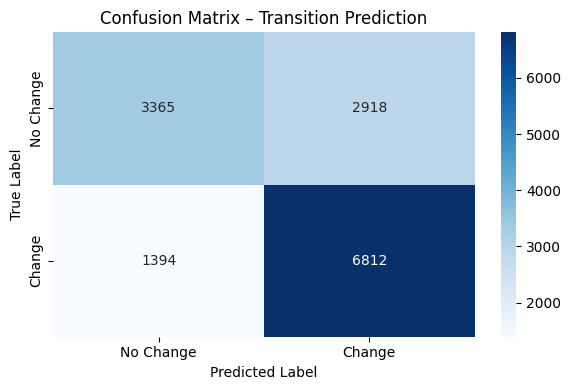

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Change", "Change"], yticklabels=["No Change", "Change"])
plt.title("Confusion Matrix – Transition Prediction")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


Markov Chain modeling

In [ ]:
# Create state transition pairs from activity_binary
states = df_lstm['activity_binary'].values
transitions = list(zip(states[:-1], states[1:]))  # (prev_state, next_state)

# Count transitions
from collections import Counter
transition_counts = Counter(transitions)

# Build the transition matrix
import numpy as np
transition_matrix = np.zeros((2, 2))

for (prev, nxt), count in transition_counts.items():
    transition_matrix[int(prev)][int(nxt)] = count

# Normalize to get probabilities
row_sums = transition_matrix.sum(axis=1, keepdims=True)
transition_prob_matrix = transition_matrix / row_sums


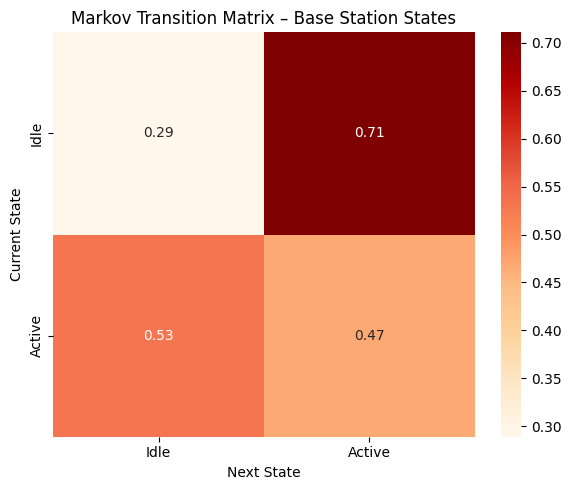

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(transition_prob_matrix, annot=True, fmt=".2f", cmap="OrRd",
            xticklabels=["Idle", "Active"], yticklabels=["Idle", "Active"])
plt.title("Markov Transition Matrix – Base Station States")
plt.xlabel("Next State")
plt.ylabel("Current State")
plt.tight_layout()
plt.show()




```
# This is formatted as code
```

 LSTM + Attention Layer model

In [ ]:
from tensorflow.keras.layers import Layer
import tensorflow.keras.backend as K

# Custom Attention Layer
class Attention(Layer):
    def __init__(self, return_attention=False, **kwargs):
        self.return_attention = return_attention
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(name="att_weight", shape=(input_shape[-1], 1),
                                 initializer="normal")
        self.b = self.add_weight(name="att_bias", shape=(input_shape[1], 1),
                                 initializer="zeros")
        super(Attention, self).build(input_shape)

    def call(self, x):
        e = K.tanh(K.dot(x, self.W) + self.b)
        a = K.softmax(e, axis=1)
        output = x * a
        if self.return_attention:
            return [K.sum(output, axis=1), a]
        return K.sum(output, axis=1)


In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

#  Model with Attention
input_shape = (X_train.shape[1], X_train.shape[2])
inputs = Input(shape=input_shape)
x = LSTM(64, return_sequences=True)(inputs)
x = Dropout(0.3)(x)
x, att_weights = Attention(return_attention=True)(x)
output = Dense(1, activation='sigmoid')(x)

model = Model(inputs, output)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 10, 4)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 10, 64)         │        17,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ attention (Attention)           │ [(None, 64), (None,    │            74 │
│                                 │ 10, 1)]                │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,803 (69.54 KB)

 Trainable params: 17,803 (69.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the attention-based model
history = model.fit(X_train, y_train, epochs=15, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/15
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.5733 - loss: 0.6828 - val_accuracy: 0.5641 - val_loss: 0.6833
Epoch 2/15
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.5812 - loss: 0.6708 - val_accuracy: 0.5720 - val_loss: 0.6509
Epoch 3/15
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.6058 - loss: 0.6456 - val_accuracy: 0.6509 - val_loss: 0.6377
Epoch 4/15
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 12s 10ms/step - accuracy: 0.6293 - loss: 0.6359 - val_accuracy: 0.5641 - val_loss: 0.6492
Epoch 5/15
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.6363 - loss: 0.6280 - val_accuracy: 0.6207 - val_loss: 0.6257
Epoch 6/15
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 13s 10ms/step - accuracy: 0.6468 - loss: 0.6219 - val_accuracy: 0.6728 - val_loss: 0.6175
Epoch 7/15
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.6492 - loss: 0.6202 - val_accuracy: 0.6893 - val_loss: 0.6150
Epoch 8/15
1210/1210 ━━━━━━━━━━━━━━━━━━━━ 14s 11ms/step - accuracy: 0.6576 -

In [ ]:
# New model to output attention weights
attention_model = Model(inputs=model.input, outputs=[model.output, att_weights])

# Get predictions and attention scores
preds, att_scores = attention_model.predict(X_test)


303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


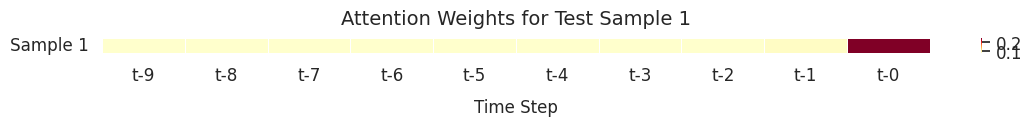

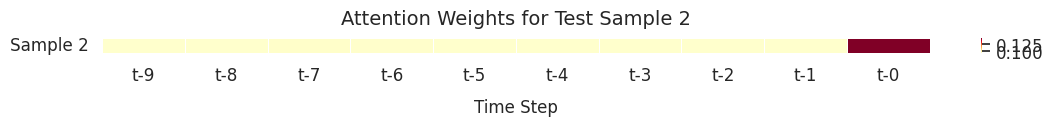

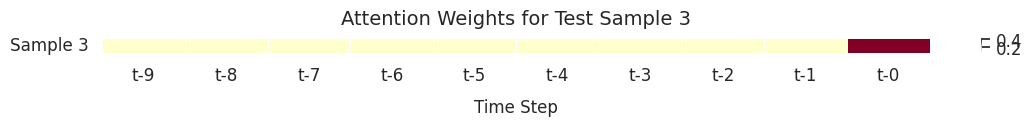

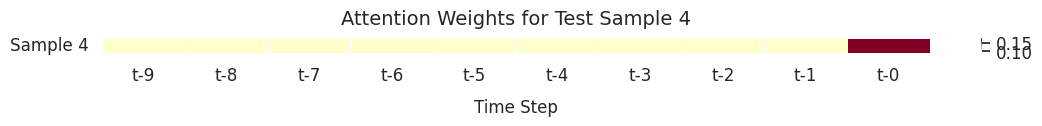

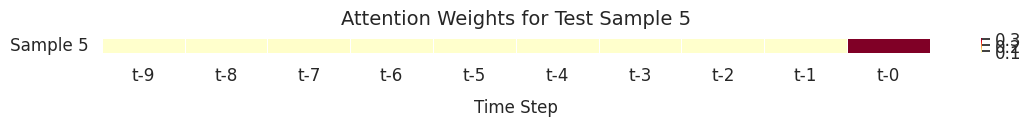

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Set global font size and spacing
sns.set(font_scale=1.1)

# Plot attention for first 5 test samples
for i in range(5):
    plt.figure(figsize=(12, 1.8))
    ax = sns.heatmap(att_scores[i].reshape(1, -1), cmap="YlOrRd", cbar=True,
                     xticklabels=[f"t-{j}" for j in reversed(range(att_scores.shape[1]))],
                     yticklabels=[f"Sample {i+1}"], linewidths=0.5, linecolor='white')

    plt.title(f"Attention Weights for Test Sample {i+1}", fontsize=14, pad=10)
    plt.xlabel("Time Step", fontsize=12, labelpad=10)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout(pad=2)
    plt.show()


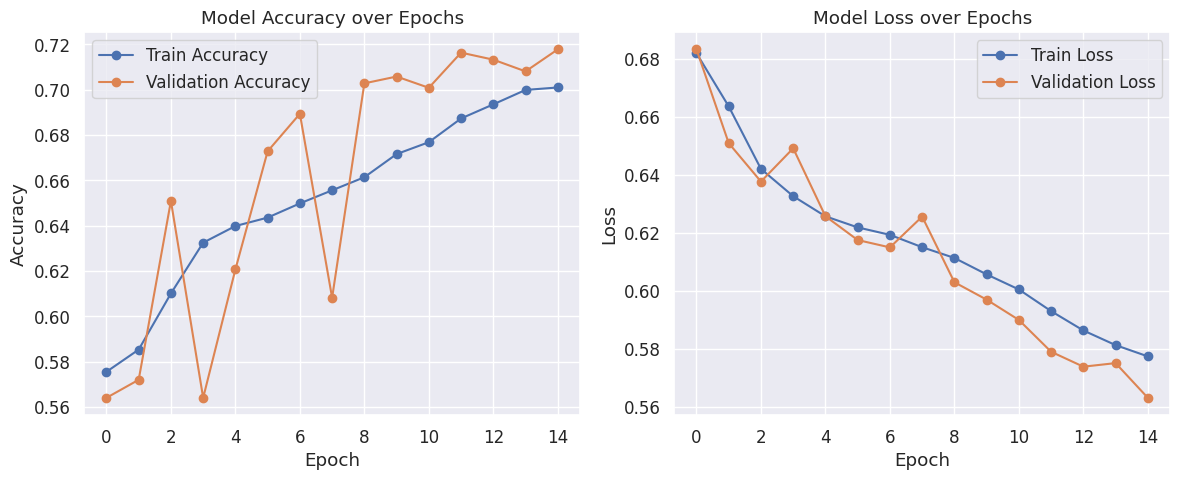

In [ ]:
import matplotlib.pyplot as plt

def plot_accuracy_loss(history):
    plt.figure(figsize=(12, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
    plt.title('Model Accuracy over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss', marker='o')
    plt.plot(history.history['val_loss'], label='Validation Loss', marker='o')
    plt.title('Model Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Call this after training:
plot_accuracy_loss(history)


303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step


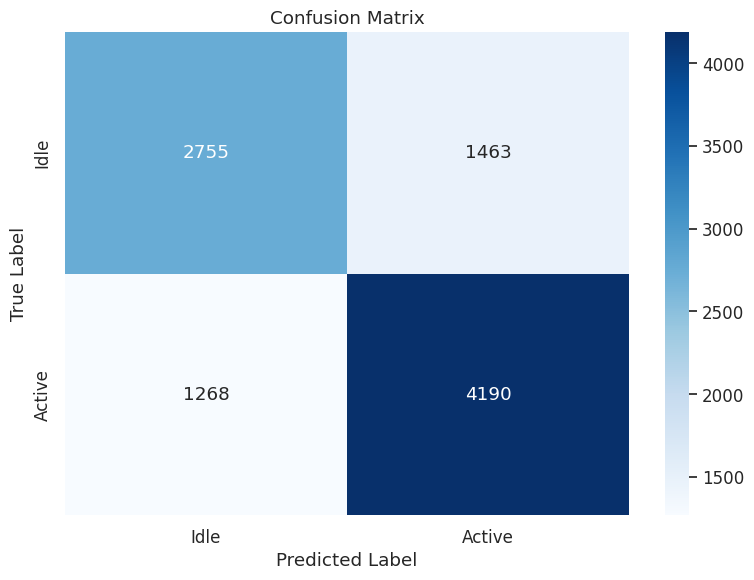

In [ ]:
# Confusion Matrix Code
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

# Get predictions from the model first
model_predictions = model.predict(X_test)  # This line was missing

# Convert predictions to binary classes
y_pred_classes = (model_predictions > 0.5).astype(int)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Create labels for the classes
class_labels = ['Idle', 'Active']  # or ['No Change', 'Change'] for transition model

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

303/303 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


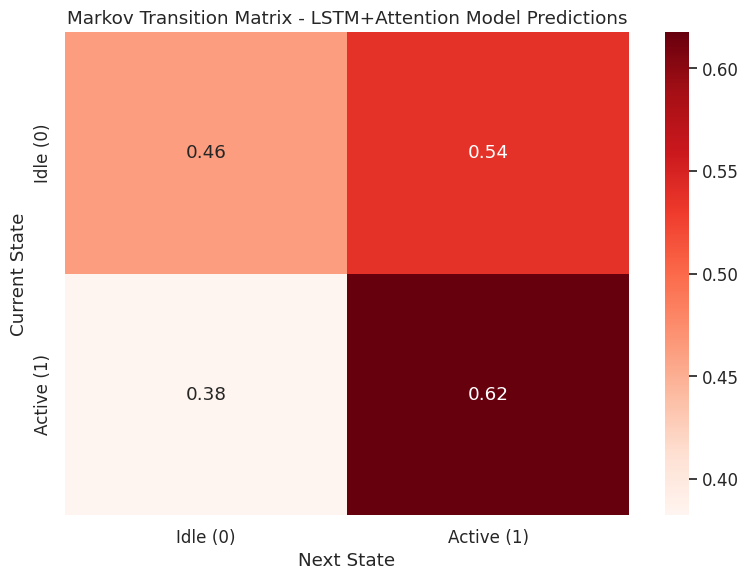

In [ ]:
# For the LSTM+Attention model
# First, get predictions from the attention model (extract just the predictions, not attention weights)
preds, att_scores = attention_model.predict(X_test)

# Convert probabilities to binary classes
y_pred_classes = (preds > 0.5).astype(int)

# Compute Markov transition matrix from model predictions
def compute_markov_matrix(states):
    """
    Compute transition probability matrix from sequence of states
    """
    # Create pairs of consecutive states
    states = np.array(states).flatten()  # Ensure it's flattened
    pairs = np.vstack((states[:-1], states[1:])).T

    # Count transitions
    transitions = {
        (0, 0): 0,  # Idle -> Idle
        (0, 1): 0,  # Idle -> Active
        (1, 0): 0,  # Active -> Idle
        (1, 1): 0   # Active -> Active
    }

    for i, j in pairs:
        transitions[(int(i), int(j))] += 1

    # Compute probabilities
    transition_matrix = np.zeros((2, 2))

    # From Idle state (0)
    idle_total = transitions[(0, 0)] + transitions[(0, 1)]
    if idle_total > 0:
        transition_matrix[0, 0] = transitions[(0, 0)] / idle_total
        transition_matrix[0, 1] = transitions[(0, 1)] / idle_total

    # From Active state (1)
    active_total = transitions[(1, 0)] + transitions[(1, 1)]
    if active_total > 0:
        transition_matrix[1, 0] = transitions[(1, 0)] / active_total
        transition_matrix[1, 1] = transitions[(1, 1)] / active_total

    return transition_matrix

# Compute transition matrix from model predictions
transition_matrix = compute_markov_matrix(y_pred_classes)

# Plot Markov transition matrix
plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, fmt='.2f', cmap='Reds',
            xticklabels=['Idle (0)', 'Active (1)'],
            yticklabels=['Idle (0)', 'Active (1)'])
plt.xlabel('Next State')
plt.ylabel('Current State')
plt.title('Markov Transition Matrix - LSTM+Attention Model Predictions')
plt.tight_layout()
plt.savefig('attention_markov_matrix.png', dpi=300, bbox_inches='tight')
plt.show()